## Load data

In [1]:
trainval <- read.csv("train-set-values.csv")
trainlab <- read.csv('train-set-labels.csv')
train <- merge(trainlab,trainval,by='id')
test <- read.csv('test-set-values.csv')

In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

## Categorical variables

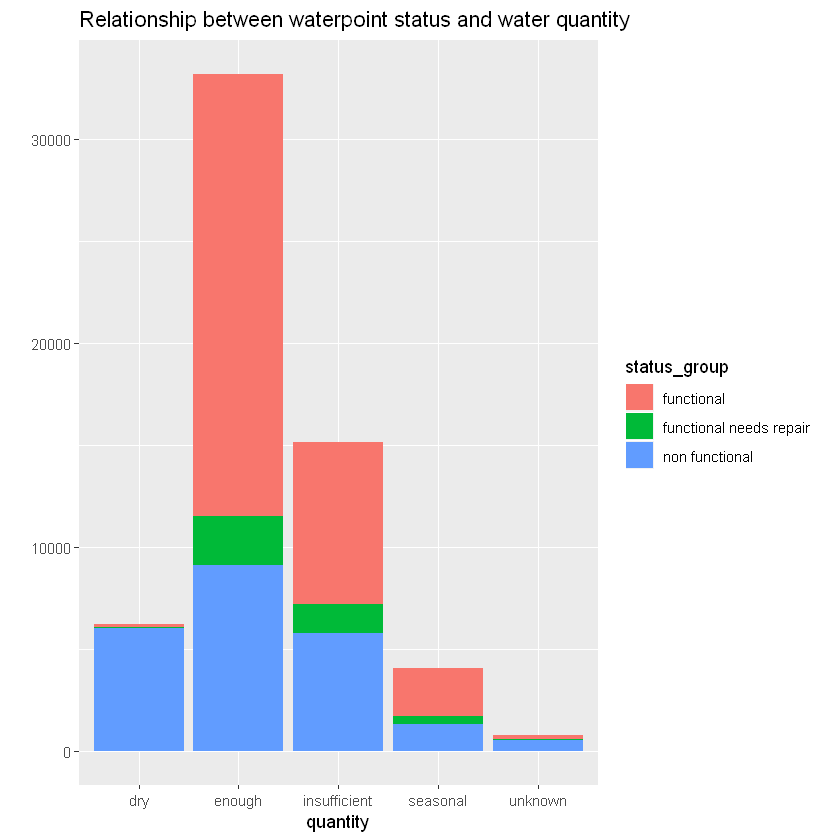

In [6]:
qplot(quantity, data=train, geom="bar", fill=status_group,
     main='Relationship between waterpoint status and water quantity') 

Where it is dry, a significant proportion of the waterpoints are non-functional. This graph shows that the higher the sufficiency of water, the higher the chances that the waterpoint is functional.

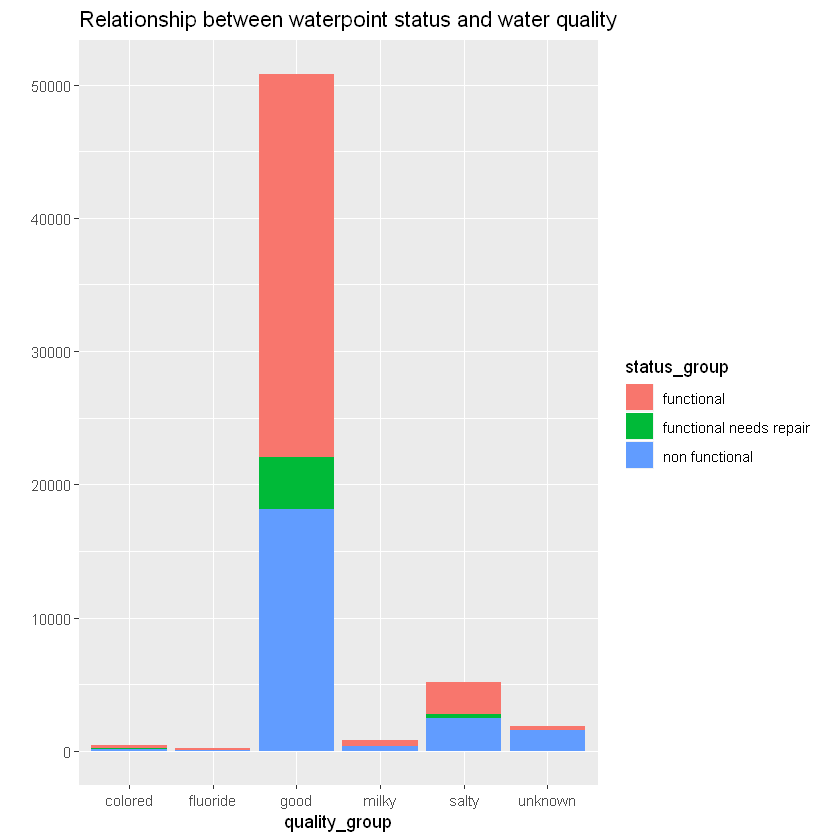

In [7]:
qplot(quality_group, data=train, geom="bar", fill=status_group,
     main='Relationship between waterpoint status and water quality')

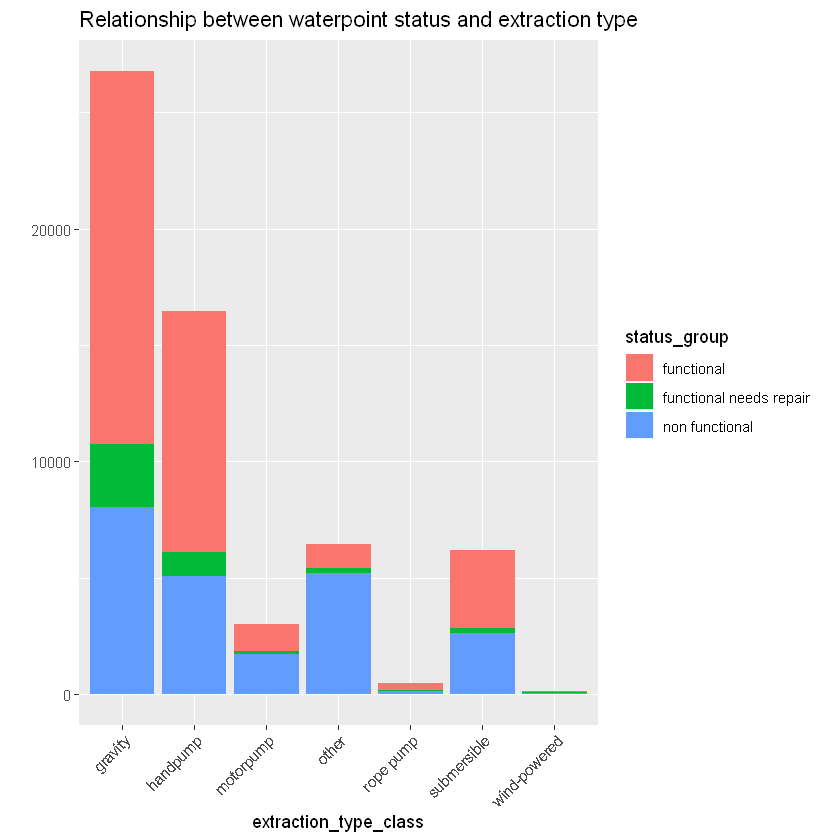

In [8]:
qplot(extraction_type_class, data=train, geom="bar", fill=status_group,
     main='Relationship between waterpoint status and extraction type') +
  theme(axis.text.x=element_text(angle = 45, hjust = 1))

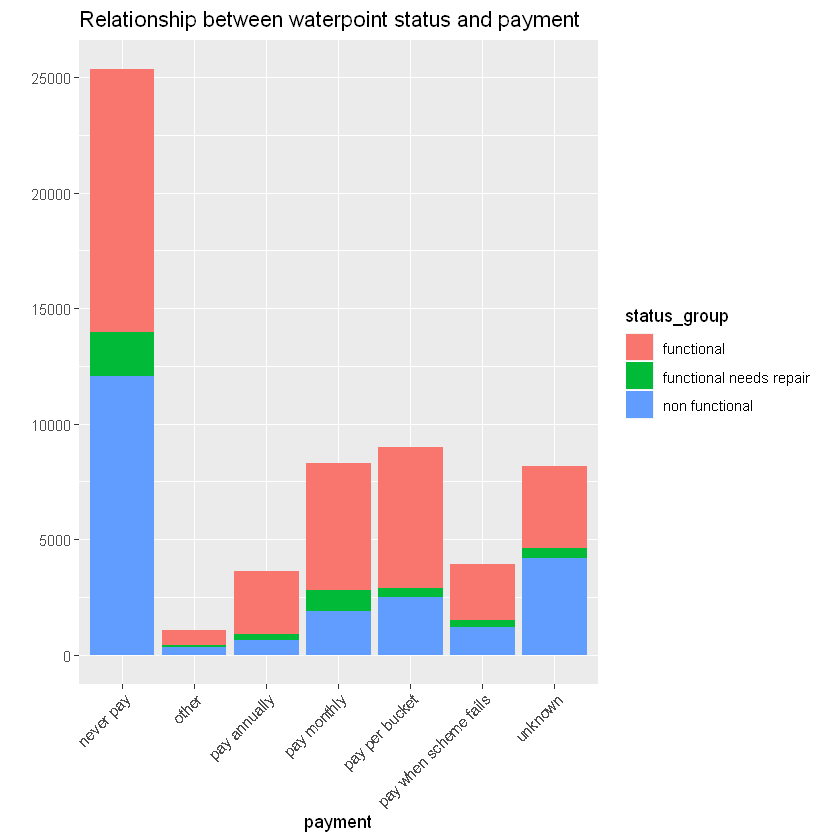

In [12]:
qplot(payment, data=train, geom="bar", fill=status_group,
     main='Relationship between waterpoint status and payment') + 
  theme(axis.text.x=element_text(angle = 45, hjust = 1))

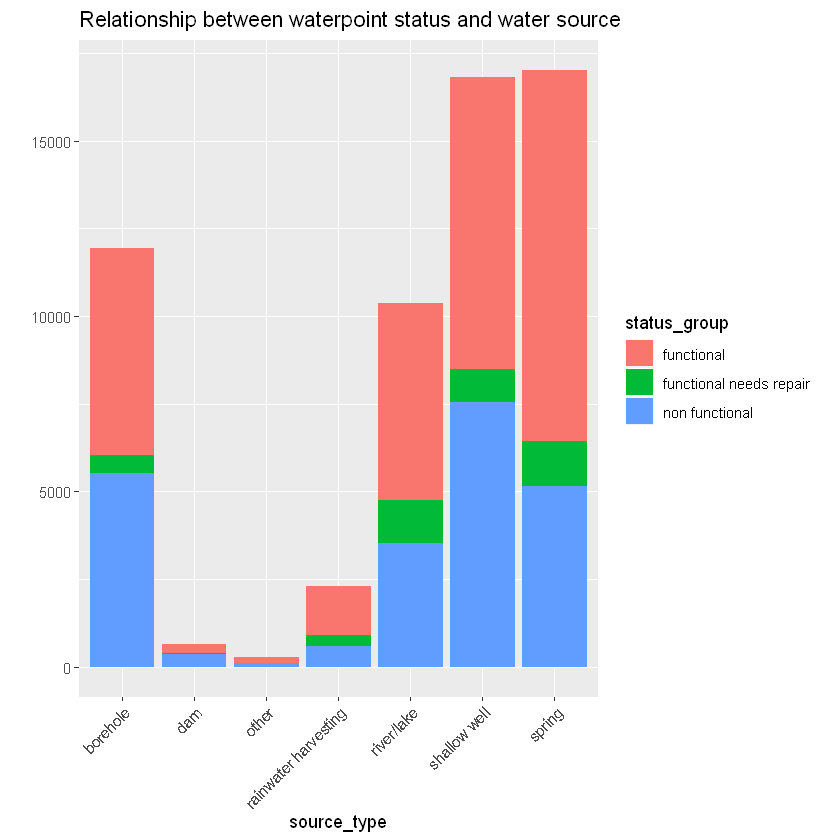

In [14]:
qplot(source_type, data=train, geom="bar", fill=status_group,
     main='Relationship between waterpoint status and water source') +
  theme(axis.text.x=element_text(angle = 45, hjust = 1))

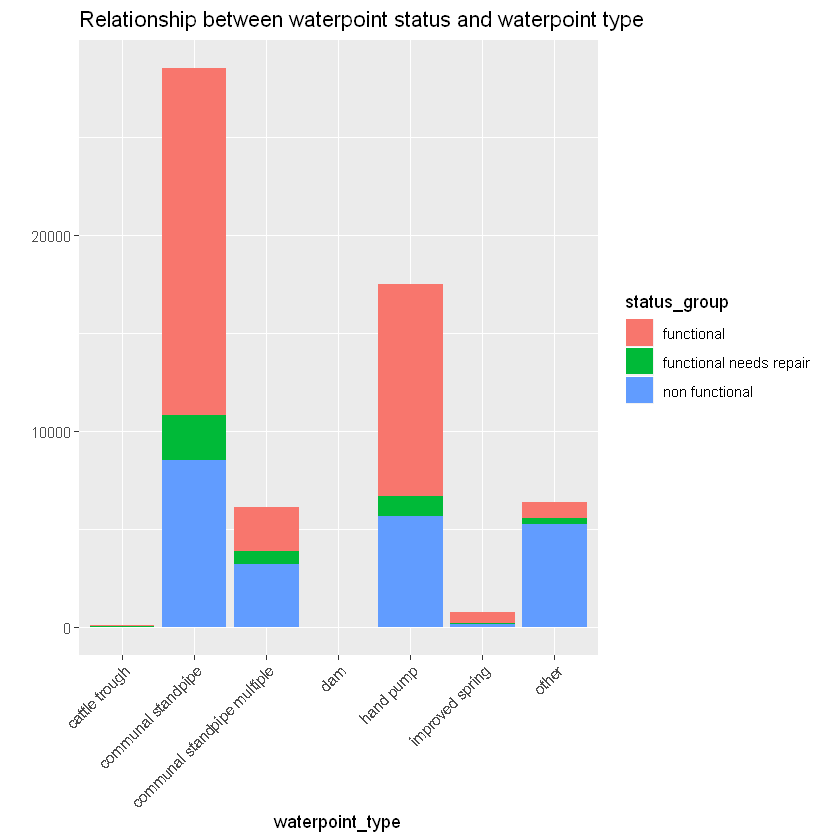

In [16]:
qplot(waterpoint_type, data=train, geom="bar", fill=status_group,
     main='Relationship between waterpoint status and waterpoint type') +
  theme(axis.text.x=element_text(angle = 45, hjust = 1))

## Continuous variables

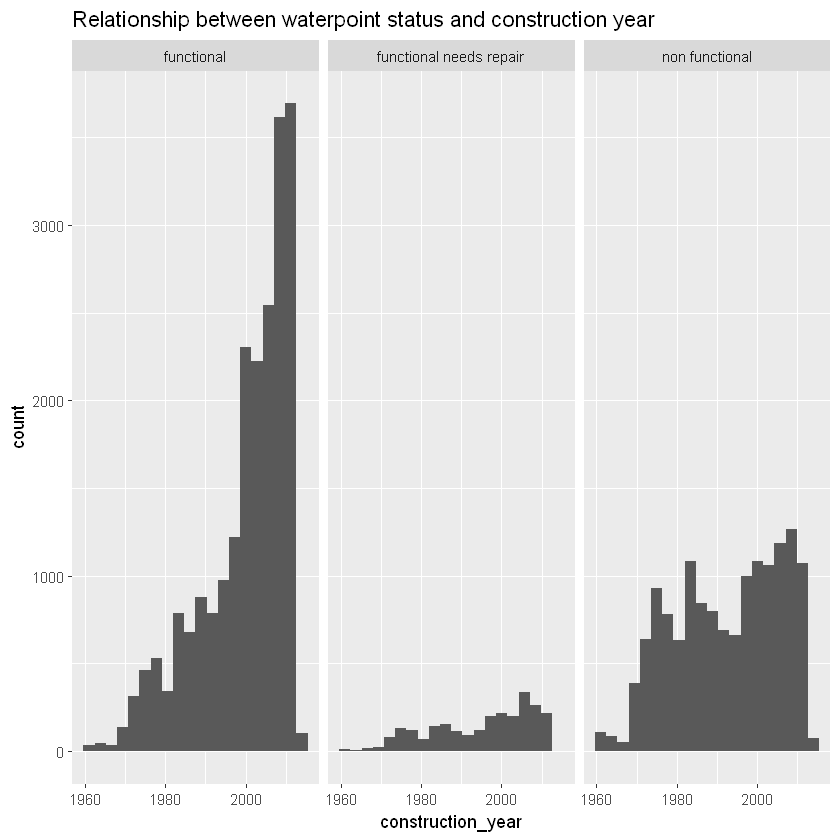

In [6]:
ggplot(subset(train, construction_year > 0), aes(x = construction_year)) +
  geom_histogram(bins = 20) + 
  facet_grid( ~ status_group) + 
ggtitle('Relationship between waterpoint status and construction year')

Some data rows had construction_year=0 so I had to select construction_year>0.

In [19]:
summary(train$population)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0    25.0   179.9   215.0 30500.0 

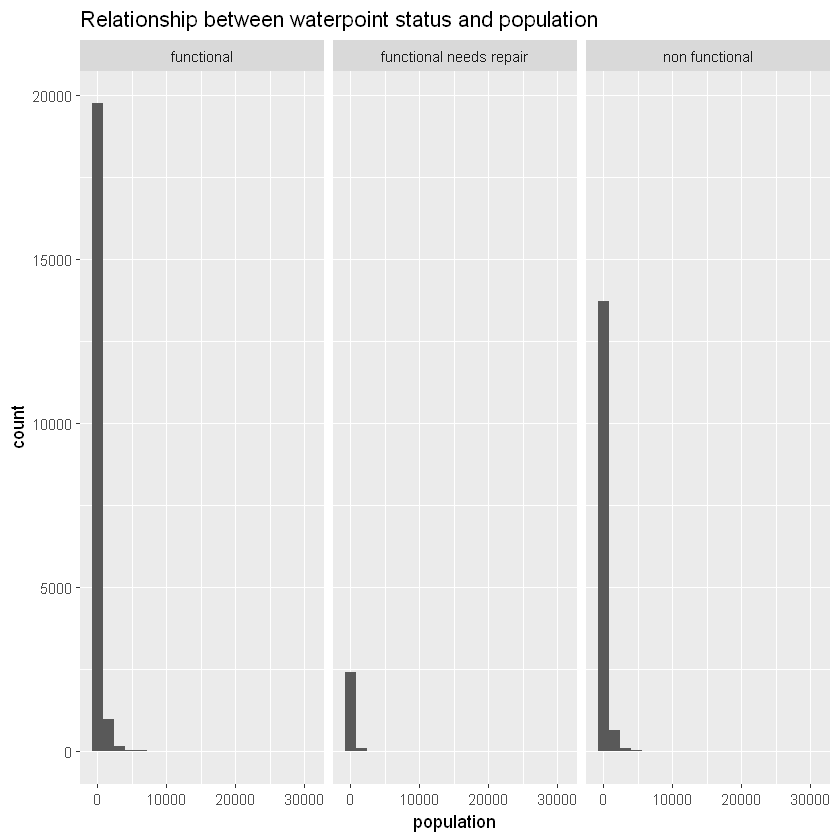

In [7]:
ggplot(subset(train, population > 0), aes(x = population)) +
  geom_histogram(bins = 20) + 
  facet_grid( ~ status_group) + 
ggtitle('Relationship between waterpoint status and population')

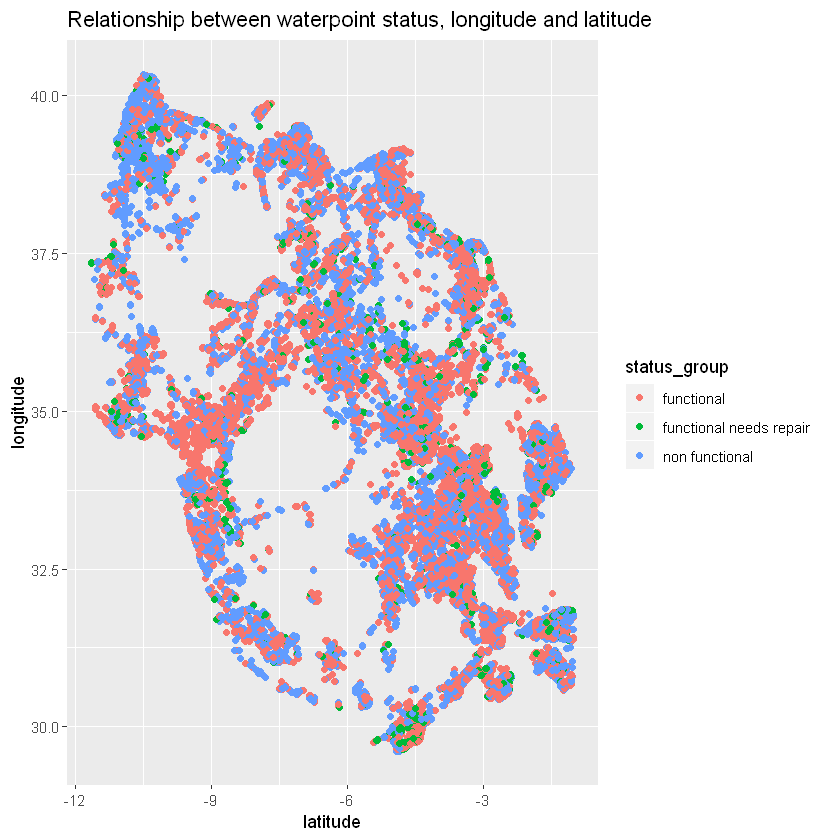

In [8]:
ggplot(subset(train, latitude < 0 & longitude > 0),
       aes(x = latitude, y = longitude, color = status_group)) + 
  geom_point() + 
ggtitle('Relationship between waterpoint status, longitude and latitude')

It seems that there are certain locations with a cluster of either functional or non-functional waterpoints.

Since gps height is closely related to the longitude and latitude, the variables are plotted to see the relationship.

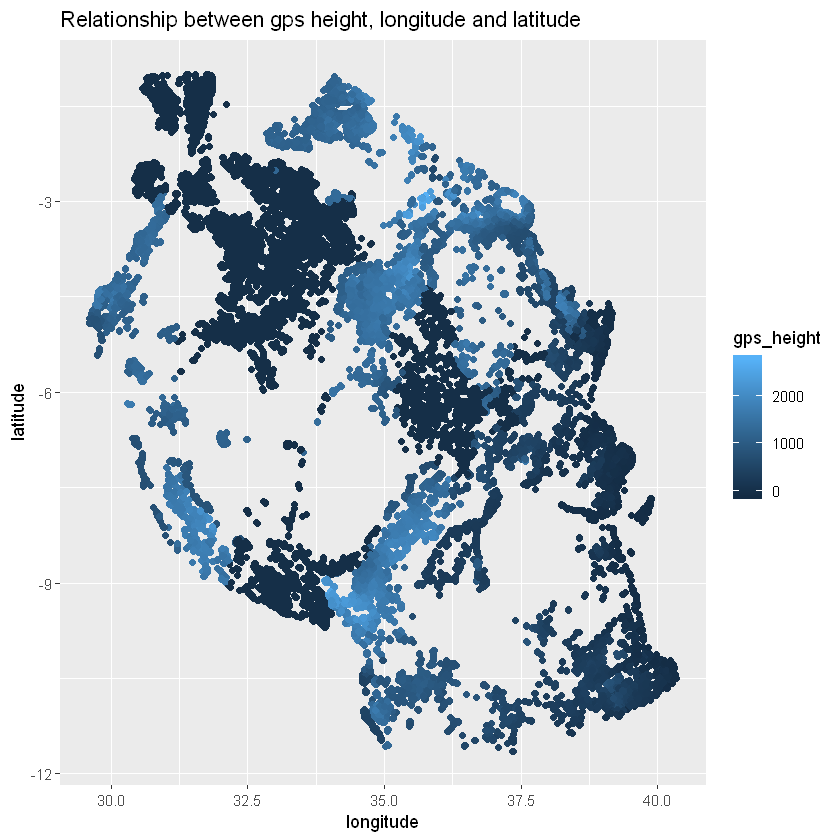

In [9]:
ggplot(subset(train, longitude > 0), 
       aes(x = longitude, y = latitude, color = gps_height)) + 
  geom_point() + 
ggtitle('Relationship between gps height, longitude and latitude')

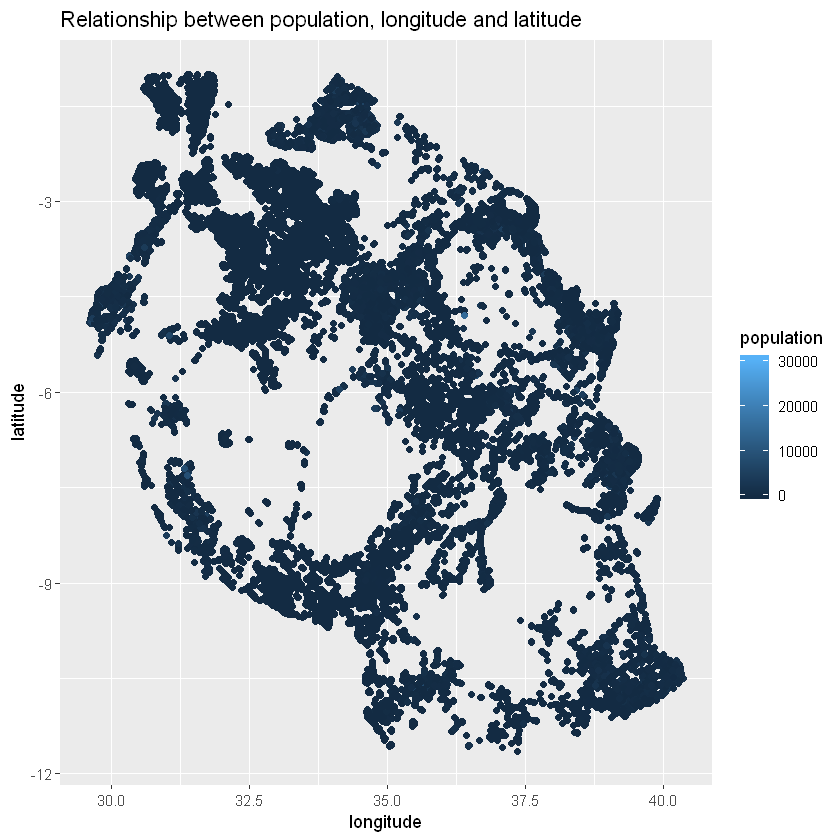

In [10]:
ggplot(subset(train, longitude > 0), 
       aes(x = longitude, y = latitude, color = population)) + 
  geom_point() + 
ggtitle('Relationship between population, longitude and latitude')